In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists


#PREP

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14662 (delta 0), reused 2 (delta 0), pack-reused 14658
Receiving objects: 100% (14662/14662), 13.25 MiB | 25.32 MiB/s, done.
Resolving deltas: 100% (9979/9979), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
!mkdir data/obj

In [ ]:
#!unzip /mydrive/yolo_train/Stickmob/train.zip -d data/obj
#!unzip /mydrive/yolo_train/Stickmob/test.zip -d data/obj

In [ ]:
!cp /mydrive/training/obj.data data/
!cp /mydrive/training/obj.names data/
!cp /mydrive/training/framestrain.txt data/train.txt
!cp /mydrive/training/framestest.txt data/test.txt

!cp /mydrive/training/yolov4-custom-1class.cfg data/
!cp /mydrive/training/yolov4.conv.137 data/

!cp -r /mydrive/training/frames/train data/obj/train
!cp -r /mydrive/training/frames/test data/obj/test

#TRAINING

YoloV3-Tiny

In [ ]:
!./darknet detector train data/obj.data data/yolov3-tiny.cfg data/yolov3-tiny.conv.11 -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
Couldn't open file: data/yolov3-tiny.cfg


YoloV3

In [ ]:
!./darknet detector train data/obj.data data/yolov3-custom.cfg data/darknet53.conv.74 -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
Couldn't open file: data/yolov3-custom.cfg


In [ ]:
!./darknet detector train data/obj.data data/yolov3-custom.cfg /mydrive/yolo_train/Stickmob/backup/yolov3-custom_last.weights -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
Couldn't open file: data/yolov3-custom.cfg


YoloV3-Letterbox

In [ ]:
!./darknet detector train data/obj.data data/yolov3-custom-letterbox.cfg data/darknet53.conv.74 -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
Couldn't open file: data/yolov3-custom-letterbox.cfg


In [ ]:
!./darknet detector train data/obj.data data/yolov3-custom-letterbox.cfg /mydrive/yolo_train/Stickmob/backup/yolov3-custom-letterbox_last.weights -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
Couldn't open file: data/yolov3-custom-letterbox.cfg


YoloV4-Tiny

In [ ]:
!./darknet detector train data/obj.data data/yolov4-tiny-custom.cfg data/yolov4-tiny.conv.29 -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
Couldn't open file: data/yolov4-tiny-custom.cfg


YoloV4-Tiny-Letterbox

In [ ]:
!./darknet detector train data/obj.data data/yolov4-tiny-letterbox-custom.cfg data/yolov4-tiny.conv.29 -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
Couldn't open file: data/yolov4-tiny-letterbox-custom.cfg


YoloV4

In [ ]:
!./darknet detector train data/obj.data data/yolov4-custom-1class.cfg data/yolov4.conv.137 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.837147), count: 40, class_loss = 1.164680, iou_loss = 12.799823, total_loss = 13.964502 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.812559), count: 3, class_loss = 0.158303, iou_loss = 0.399014, total_loss = 0.557317 
 total_bbox = 1114071, rewritten_bbox = 0.029531 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.745910), count: 20, class_loss = 1.450571, iou_loss = 12.640020, total_loss = 14.090591 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.842198), count: 46, class_loss = 0.375240, iou_loss = 10.502527, total_loss = 10.877768 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.818251), count: 9, class_loss = 0.174422, iou_loss = 1.661471, total_loss = 1.835894 
 total_bbox = 1114146, rewritten_bbox = 0.0

In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
!./darknet detector train data/obj.data data/yolov4-custom-1class.cfg /mydrive/training/backup/yolov4-custom-1class_final.weights -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 con

```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```

```
var startClickConnect = function startClickConnect(){
    var clickConnect = function clickConnect(){
        console.log("Connnect Clicked - Start");
        document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
        console.log("Connnect Clicked - End"); 
    };
 
    var intervalId = setInterval(clickConnect, 60000);
 
    var stopClickConnectHandler = function stopClickConnect() {
        console.log("Connnect Clicked Stopped - Start");
        clearInterval(intervalId);
        console.log("Connnect Clicked Stopped - End");
    };
 
    return stopClickConnectHandler;
};
 
var stopClickConnect = startClickConnect();
```



#MAP

YoloV3

In [ ]:
!./darknet detector map data/obj.data data/yolov3-custom.cfg /mydrive/yolo_train/Stickmob/backup_yolov3/yolov3-custom_best.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Couldn't open file: data/yolov3-custom.cfg


YoloV3-Letterbox

In [ ]:
!./darknet detector map data/obj.data data/yolov3-custom-letterbox.cfg /mydrive/yolo_train/Stickmob/backup/yolov3-custom-letterbox_best.weights -letter_box

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Couldn't open file: data/yolov3-custom-letterbox.cfg


YoloV4-Tiny

In [ ]:
!./darknet detector map data/obj.data data/yolov4-tiny-custom.cfg /mydrive/yolo_train/Stickmob/backup/yolov4-tiny-custom_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9

YoloV4-Tiny-Letterbox

In [ ]:
!./darknet detector map data/obj.data data/yolov4-tiny-custom.cfg /mydrive/yolo_train/Stickmob/backup/yolov4-tiny-custom_last.weights

YoloV4

In [ ]:
!./darknet detector map data/obj.data data/yolov4-custom-1class.cfg /mydrive/training/backup/yolov4-custom-1class_best.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 

#TEST

In [ ]:
!./darknet detector test data/obj.data /mydrive/yolo_train/Stickmob/yolov4-custom.cfg /mydrive/yolo_train/Stickmob/backup/yolov4-custom_best.weights /mydrive/yolo_train/Sample/6.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 

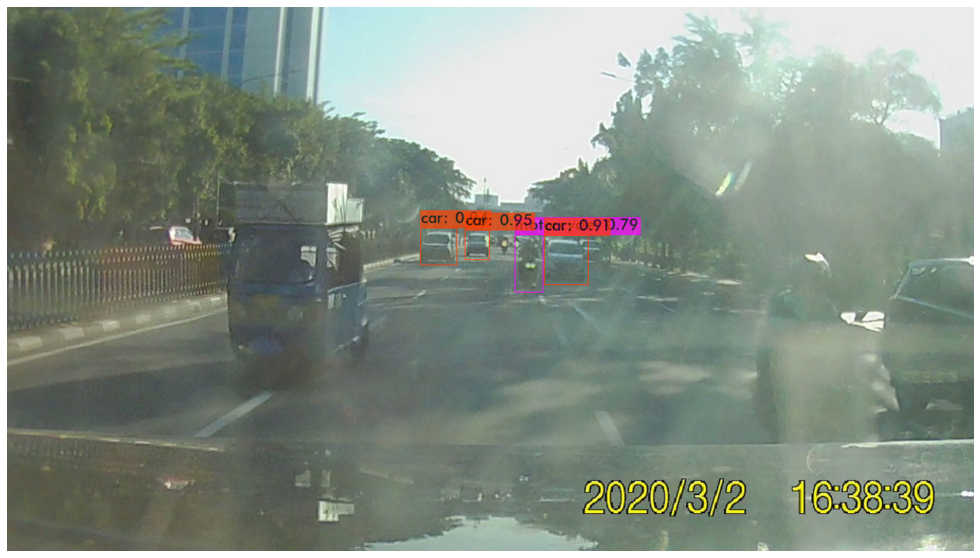

In [ ]:
imShow('predictions.jpg')

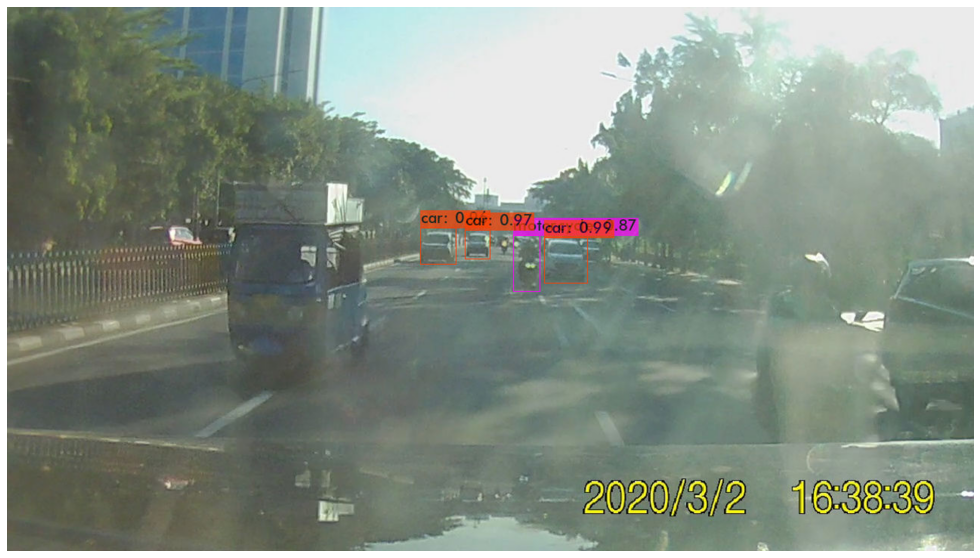

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data data/yolov3-custom.cfg /mydrive/yolo_train/Stickmob/backup_yolov3/yolov3-custom_best.weights /mydrive/yolo_train/Sample/6.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, ou

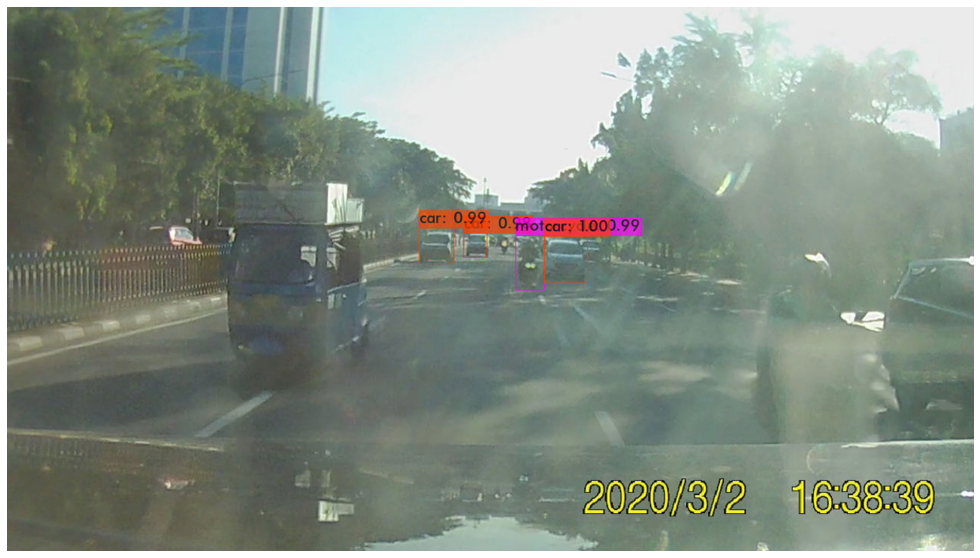

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data data/yolov3-custom-letterbox.cfg /mydrive/yolo_train/Stickmob/backup/yolov3-custom-letterbox_best.weights /mydrive/yolo_train/Sample/6.jpg --letter_box

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, ou

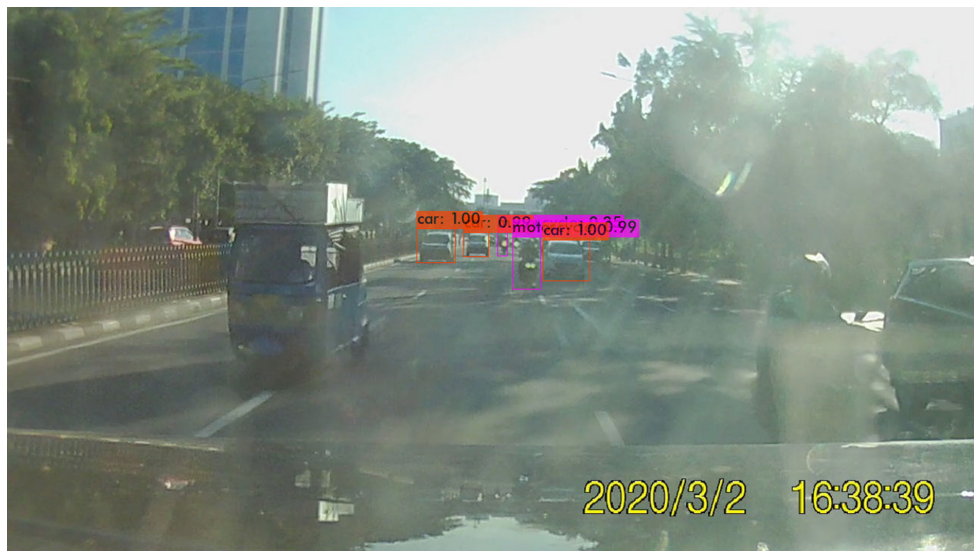

In [ ]:
imShow('predictions.jpg')

# CONVERT

In [ ]:
%cd /content
!git clone https://github.com/hunglc007/tensorflow-yolov4-tflite.git
%cd /content/tensorflow-yolov4-tflite

/content
Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 780, done.
remote: Total 780 (delta 0), reused 0 (delta 0), pack-reused 780
Receiving objects: 100% (780/780), 197.64 MiB | 33.53 MiB/s, done.
Resolving deltas: 100% (371/371), done.
/content/tensorflow-yolov4-tflite


In [ ]:
!cp /content/darknet/data/obj.names /content/tensorflow-yolov4-tflite/data/classes/
!ls /content/tensorflow-yolov4-tflite/data/classes/

coco.names  obj.names  voc.names  yymnist.names


In [ ]:
!cat /content/tensorflow-yolov4-tflite/data/classes/obj.names

motorcycle
car
bus
truck


In [ ]:
!sed -i "s/coco.names/obj.names/g" /content/tensorflow-yolov4-tflite/core/config.py

In [ ]:
# Regular TensorFlow SavedModel
!python save_model.py \
  --weights /mydrive/yolo_train/Stickmob/backup/yolov4-tiny-custom_best.weights \
  --output ./checkpoints/yolov4-tiny-416 \
  --input_size 416 \
  --model yolov4 \
  --tiny \

# SavedModel to convert to TFLite
!python save_model.py \
  --weights /mydrive/yolo_train/Stickmob/backup/yolov4-tiny-custom_best.weights \
  --output ./checkpoints/yolov4-tiny-pretflite-416 \
  --input_size 416 \
  --model yolov4 \
  --tiny \
  --framework tflite

2020-10-20 17:35:15.146622: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-20 17:35:16.931203: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-20 17:35:16.991014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-20 17:35:16.991588: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-10-20 17:35:16.991628: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-20 17:35:17.229195: I tensorflow/stream_executor/platform/default

In [ ]:
!python convert_tflite.py --weights ./checkpoints/yolov4-tiny-pretflite-416 --output ./checkpoints/yolov4-tiny-416.tflite

In [ ]:
!python convert_tflite.py --weights ./checkpoints/yolov4-tiny-pretflite-416 --output ./checkpoints/yolov4-tiny-416-int8.tflite --quantize_mode int8 --dataset /content/darknet/data/train.txt

2020-10-20 17:39:47.449329: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-20 17:39:48.733740: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-20 17:39:48.766212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-20 17:39:48.766773: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-10-20 17:39:48.766809: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-20 17:39:48.768380: I tensorflow/stream_executor/platform/default

In [ ]:
!python detect.py --weights /mydrive/yolo_train/Stickmob/yolov4-tiny-416.tflite --size 416 --model yolov4 \
  --image /mydrive/yolo_train/Sample/6.jpg \
  --framework tflite

2020-10-21 01:52:58.194466: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-21 01:52:59.487430: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-21 01:52:59.492026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-21 01:52:59.492568: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-10-21 01:52:59.492605: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-21 01:52:59.494131: I tensorflow/stream_executor/platform/default

In [ ]:
# TensorFlow SavedModel
!cp -r /content/tensorflow-yolov4-tflite/checkpoints/yolov4-tiny-416/ /mydrive/yolo_train/Stickmob/
# TensorFlow Lite
!cp /content/tensorflow-yolov4-tflite/checkpoints/yolov4-tiny-416.tflite /mydrive/yolo_train/Stickmob/

In [ ]:
import tensorflow as tf
import cv2
import glob
import numpy as np

# Convert the model
saved_model_dir = '/mydrive/yolo_train/Stickmob/yolov4-tiny-416/'

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
def representative_dataset_gen():
  a = []
  flag = 0
  for filename in glob.glob('/content/darknet/data/obj/train/*.jpg'):
      flag+=1
      if flag > 100:
        break
      img = cv2.imread(filename)
      img = cv2.resize(img, (416, 416))
      img = img / 255.0
      img = img.astype(np.float32)
      a.append(img)
  a = np.array(a)
  print(a.shape) # a is np array of 160 3D images
  img = tf.data.Dataset.from_tensor_slices(a).batch(1)
  for x in img.take(64):
      print(x)
      yield [x]

converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

# Save the model.
with open('model_quant.tflite', 'wb') as f:
  f.write(tflite_quant_model)

(100, 416, 416, 3)
tf.Tensor(
[[[[0.7764706  0.80784315 0.78039217]
   [0.7764706  0.80784315 0.78039217]
   [0.77254903 0.8039216  0.7764706 ]
   ...
   [0.78431374 0.7764706  0.68235296]
   [0.78039217 0.77254903 0.6784314 ]
   [0.78431374 0.7764706  0.68235296]]

  [[0.7764706  0.80784315 0.78039217]
   [0.7764706  0.80784315 0.78039217]
   [0.77254903 0.8039216  0.7764706 ]
   ...
   [0.78431374 0.7764706  0.68235296]
   [0.78431374 0.7764706  0.68235296]
   [0.78431374 0.7764706  0.68235296]]

  [[0.7764706  0.80784315 0.78039217]
   [0.7764706  0.80784315 0.78039217]
   [0.77254903 0.8039216  0.7764706 ]
   ...
   [0.78431374 0.7764706  0.68235296]
   [0.78431374 0.7764706  0.68235296]
   [0.78431374 0.7764706  0.68235296]]

  ...

  [[0.92156863 0.92156863 0.92156863]
   [0.92156863 0.92156863 0.92156863]
   [0.92156863 0.92156863 0.92156863]
   ...
   [0.92156863 0.92941177 0.90588236]
   [0.91764706 0.92156863 0.90588236]
   [0.9137255  0.91764706 0.9019608 ]]

  [[0.92156863 

RuntimeError: ignored

In [ ]:
!ls

3rdparty	       DarknetConfig.cmake.in  model.tflite
backup		       darknet_images.py       net_cam_v3.sh
build		       darknet.py	       net_cam_v4.sh
build.ps1	       darknet_video.py        obj
build.sh	       data		       README.md
cfg		       image_yolov3.sh	       results
chart.png	       image_yolov4.sh	       scripts
chart_yolov3-tiny.png  include		       src
cmake		       json_mjpeg_streams.sh   video_yolov3.sh
CMakeLists.txt	       LICENSE		       video_yolov4.sh
darknet		       Makefile


# Test Anchor

In [ ]:
!pwd

/content/darknet


In [ ]:
!./darknet detector calc_anchors data/obj.data -num_of_clusters 9 -width 416 -height 416

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0

 num_of_clusters = 9, width = 416, height = 416 
 read labels from 2699 images 
 loaded 	 image: 2699 	 box: 9080
 all loaded. 

 calculating k-means++ ...

 iterations = 133 


counters_per_class = 4278, 3786, 209, 807

 avg IoU = 74.14 % 

Saving anchors to the file: anchors.txt 
anchors =  12, 35,  17, 72,  28, 46,  27,114,  45, 74,  46,159,  70,113, 100,164, 161,203
^C
